In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ptl
import seaborn as sns
import statistics as sts
import statsmodels.formula.api as sm
from collections import Counter
%matplotlib inline

In [58]:
df_android = pd.read_csv('googleplaystore.csv')

In [59]:
df_android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<font size="5"><b>Data cleaning</b></font><br>

<font size="4"><b>Drop unnessecary columns</b></font><br>

In [60]:
android_clean = df_android.drop(['Genres', 'Last Updated', 'Current Ver'], axis = 1)
android_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,4.4 and up


In [61]:
android_clean["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

<font size="4"><b>Rename columns</b></font><br>

In [62]:
android_clean.rename(columns={"App": "name_length", "Size":"size", "Price":"price", "Reviews":"reviews", "Rating":"rating", "Category":"category", "Installs":"installs", "Android Ver":"aversion", "Type":"not_free", "Content Rating":"cont_rating"}, inplace=True)
android_clean.head()

,name_length,category,rating,reviews,size,installs,not_free,price,cont_rating,aversion
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,4.4 and up


<font size="4"><b>Cleaning each column</b></font><br>

In [63]:
#category
android_clean = android_clean[~android_clean['category'].isin(['1.9'])]

In [64]:
#rating
android_clean = android_clean[~(android_clean[['rating']] > 5).any(axis=1)]

In [65]:
#reviews
android_clean['reviews'] = android_clean['reviews'].apply(int)

In [66]:
android_clean.dtypes

name_length     object
category        object
rating         float64
reviews          int64
size            object
installs        object
not_free        object
price           object
cont_rating     object
aversion        object
dtype: object

In [67]:
#size
android_clean = android_clean[~android_clean['size'].isin(['Varies with device'])]

sizes = []
for element in android_clean["size"]:
    if('M' in str(element)):
        removed_m = element.replace("M", "")
        sizes.append(float(removed_m))
    elif('k' in str(element)):
        removed_k = element.replace("k", "")
        sizes.append(float(removed_k)/1000)
    else:
        sizes.append(float(element))
android_clean['size'] = sizes

In [68]:
#installs
installs = []
for element in android_clean.installs:
    if('+' in element):
        removed_plus = element.replace('+', '')
        if(',' in element):
            clean_string = removed_plus.replace(',', '')
            installs.append(int(clean_string))
        else:
            installs.append(int(removed_plus))
    else:
        installs.append(int(element))        
android_clean['installs'] = installs

In [69]:
#price
android_clean = android_clean[~android_clean['price'].isin(['Everyone'])]

prices = []
for element in android_clean.price:
    if('$' in element):
        clean_string = element.replace('$', '')
        prices.append(float(clean_string))
    else:
        prices.append(float(element))
android_clean['price'] = prices

android_clean = android_clean[android_clean['price']>=0.0]
android_clean = android_clean[android_clean['price']<200]
android_clean = android_clean[~android_clean['price'].isnull()]

In [70]:
#app name
lengths = []
for row in android_clean.name_length:
    lengths.append(len(str(row)))
android_clean['name_length'] = lengths

In [71]:
def version_transform (ver):
    p_counter = 0
    for char in ver:
        if char == ".":
            p_counter = p_counter+1
    if p_counter == 1:
        return ver
    if p_counter == 2:
        var_splitted = ver.split(".")
        var_res = var_splitted[0]+"."+var_splitted[1]+var_splitted[2]
        return var_res
    elif p_counter == 3:
        var_splitted = ver.split(".")
        var_res = var_splitted[0]+"."+var_splitted[1]+var_splitted[2] + var_splitted[3]
        return var_res
    elif p_counter == 4:
        var_splitted = ver.split(".")
        var_res = var_splitted[0]+"."+var_splitted[1]+var_splitted[2] + var_splitted[3] + var_splitted[4]
        return var_res


In [72]:
#android version
android_clean = android_clean.dropna()
android_clean = android_clean[android_clean['aversion'].str.contains('and up')]

aversion = []
for element in android_clean['aversion']:
    if('W and up' in element):
        clean_string = element.replace('W and up', '')
        aversion.append(float(version_transform(clean_string)))
    elif('and up' in element):
        clean_string = element.replace(' and up', '')
        aversion.append(float(version_transform(clean_string)))
android_clean['aversion'] = aversion

In [73]:
#age
android_clean = android_clean[pd.notnull(android_clean['cont_rating'])]
android_clean = android_clean[android_clean['cont_rating'] != "Unrated"]

new_age = []
for row in android_clean['cont_rating']:
    if('Everyone 10+' in row):
        new_age.append(10)
    elif('Mature 17+' in row):
        new_age.append(17)
    elif('Adults only 18+' in row):
        new_age.append(18)
    elif('Everyone' in row):
        new_age.append(0)
    elif('Teen' in row):
        new_age.append(13)
android_clean["cont_rating"] = new_age

In [74]:
#type
android_clean = android_clean[android_clean['not_free'] != str(0)]

<font size="4"><b>Dataset after cleaning</b></font><br>

In [75]:
android_clean.head()

,name_length,category,rating,reviews,size,installs,not_free,price,cont_rating,aversion
0,46,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,0,4.03
1,19,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,0,4.03
2,50,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,0,4.03
3,21,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,13,4.20
4,37,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,0,4.40


<font size="5"><b>Descriptiv analysis</b></font><br>

<font size="4"><b>Descriptiv values dataframe</b></font><br>

In [76]:
#dataframe with all numeric values
df_descript = pd.DataFrame(index = ['Mean', 'Median', 'Std', 'Mode'], columns = android_clean.columns)
for column in android_clean:
    data = Counter(android_clean[column])
    if(column != 'category' and column != 'content_rating' and column != 'not_free'):
        tmp = android_clean[column].describe()
        df_descript[column]['Mean'] = tmp[1]
        df_descript[column]['Median'] = tmp[5]
        df_descript[column]['Std'] = tmp[2]
        #zipping the most_common tuple into two sublists
        sub_list1, sub_list2 = zip(*data.most_common(1))
        df_descript[column]['Mode'] = sub_list1[0]
    elif(column == 'category'):
        sub_list1, sub_list2 = zip(*data.most_common(1))
        df_descript[column]['Mode'] = sub_list1[0]
df_descript

,name_length,category,rating,reviews,size,installs,not_free,price,cont_rating,aversion
Mean,22.958,NaN,4.17333,295039,23.0146,8.20133e+06,NaN,0.370031,2.68868,3.85788
Median,22,NaN,4.3,2277.5,14,100000,NaN,0,0,4.1
Std,12.21,NaN,0.545694,1.87188e+06,23.4883,4.93893e+07,NaN,2.35182,5.45663,0.848159
Mode,30,FAMILY,4.4,2,14,1000000,NaN,0,0,4.1


<font size="4"><b>Descriptiv plots</b></font><br>

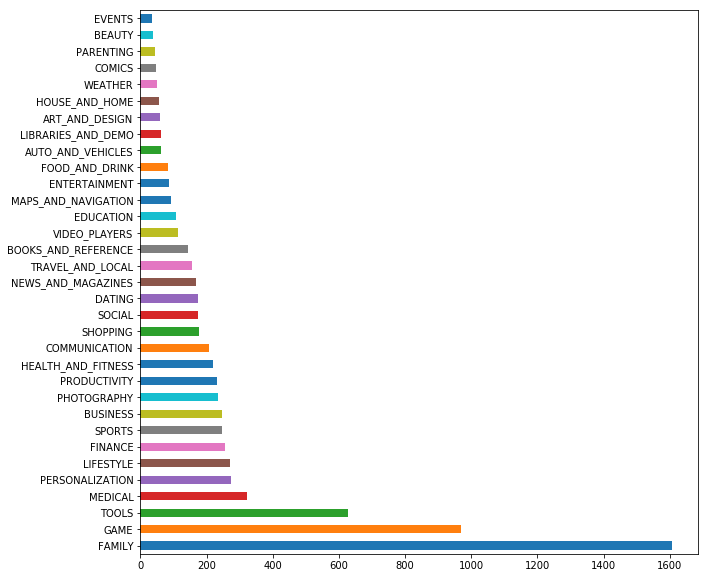

In [77]:
#category - bar chart
android_clean["category"].value_counts().plot(kind="barh", figsize=(10, 10));

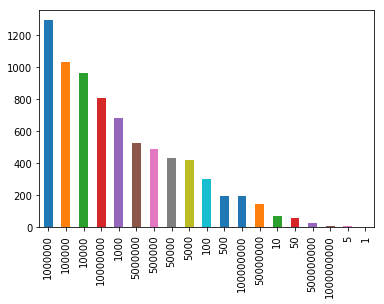

In [78]:
#installs - bar chart
android_clean["installs"].value_counts().plot(kind="bar");

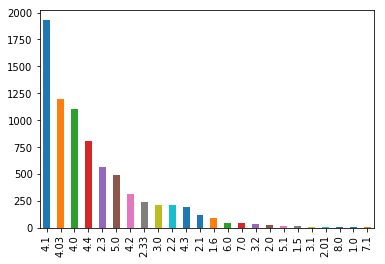

In [79]:
#android version - bar chart
android_clean["aversion"].value_counts().plot(kind="bar");

count    7648.000000
mean        4.173326
std         0.545694
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

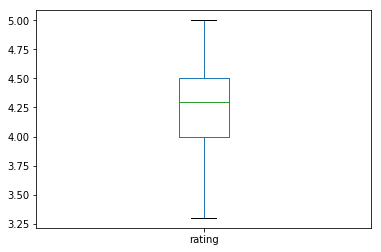

In [80]:
#rating - boxplot
android_clean["rating"].plot(kind = 'box', showfliers = False);
android_clean["rating"].describe()

In [81]:
android_clean["price"].describe()

count    7648.000000
mean        0.370031
std         2.351816
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: price, dtype: float64

count    7.648000e+03
mean     2.950390e+05
std      1.871878e+06
min      1.000000e+00
25%      1.057500e+02
50%      2.277500e+03
75%      3.838600e+04
max      4.489389e+07
Name: reviews, dtype: float64

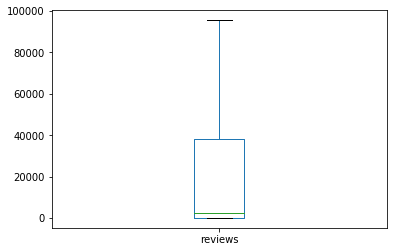

In [82]:
#reviews - boxplot
android_clean["reviews"].plot(kind = 'box', showfliers = False);
android_clean["reviews"].describe()

count    7648.000000
mean       23.014574
std        23.488269
min         0.008500
25%         5.300000
50%        14.000000
75%        33.000000
max       100.000000
Name: size, dtype: float64

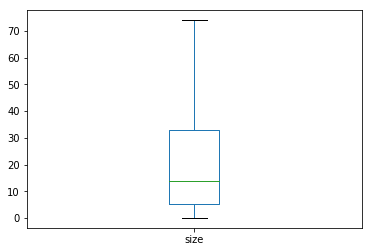

In [83]:
#size - boxplot
android_clean["size"].plot(kind = 'box', showfliers = False);
android_clean["size"].describe()

count    7648.000000
mean        3.857878
std         0.848159
min         1.000000
25%         4.000000
50%         4.100000
75%         4.200000
max         8.000000
Name: aversion, dtype: float64

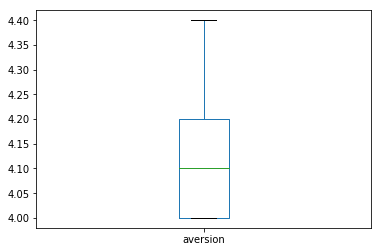

In [84]:
#android version - boxplot
android_clean["aversion"].plot(kind = 'box', showfliers = False);
android_clean["aversion"].describe()

count    7648.000000
mean        4.173326
std         0.545694
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64


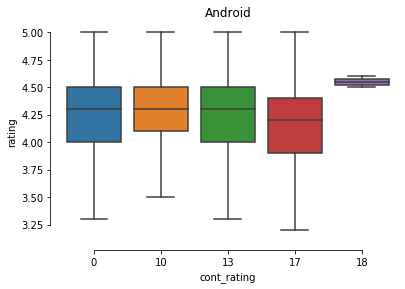

In [85]:
print(android_clean.rating.describe())

g = sns.boxplot(x="cont_rating", y="rating", data=android_clean, showfliers = False)
g.set_title("Android")
sns.despine(offset=10, trim=True)

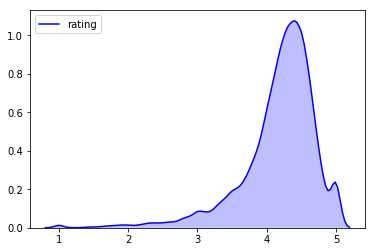

In [86]:
sns.kdeplot(android_clean['rating'], color="Blue", shade = True)

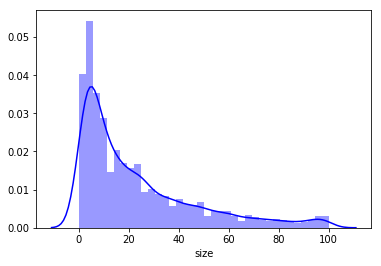

In [87]:
#distplot -> Size, App -> mehr oder weniger genormte Werte
sns.distplot(android_clean['size'], color="b")

In [88]:
#rating cleaning -> round values
new_ratings = []
for row in android_clean.rating:
    if(float(row)>=1.0 and float(row)<1.5):
        new_ratings.append(float(1.0))
    elif(float(row)>=1.5 and float(row)<2.0):
        new_ratings.append(float(1.5))
    elif(float(row)>=2.0 and float(row)<2.5):
        new_ratings.append(float(2.0))
    elif(float(row)>=2.5 and float(row)<3.0):
        new_ratings.append(float(2.5))
    elif(float(row)>=3.0 and float(row)<3.5):
        new_ratings.append(float(3.0))
    elif(float(row)>=3.5 and float(row)<4.0):
        new_ratings.append(float(3.5))
    elif(float(row)>=4.0 and float(row)<4.5):
        new_ratings.append(float(4.0))
    elif(float(row)>=4.5 and float(row)<5.0):
        new_ratings.append(float(4.5))
    elif(float(row)==5.0):
        new_ratings.append(float(5.0))
android_rating = android_clean.copy(deep=True)
android_rating["rating"] = new_ratings

In [89]:
#alle zu populaeren apps rausnehmen
# android_clean = android_clean[~(android_clean[['installs']] > 200000000).any(axis=1)]

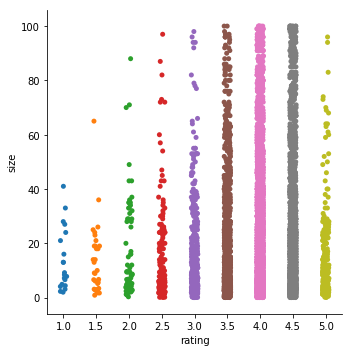

In [90]:
#catplot
sns.catplot(x="rating", y="size", data=android_rating);

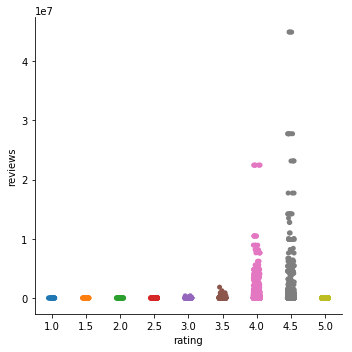

In [91]:
sns.catplot(x="rating", y="reviews", data=android_rating);

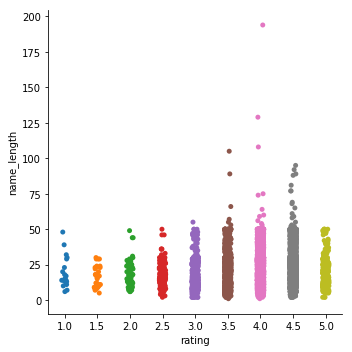

In [92]:
sns.catplot(x="rating", y="name_length", data=android_rating);

<font size="5"><b>correlation table</b></font><br>

In [93]:
corr = android_clean.corr().round(2)
corr.style.background_gradient(cmap='Reds')

,name_length,rating,reviews,size,installs,price,cont_rating,aversion
name_length,1,0.13,-0.04,0.03,-0.04,0,0.08,0.1
rating,0.13,1,0.08,0.08,0.05,0.02,0.02,0.05
reviews,-0.04,0.08,1,0.24,0.64,-0.02,0.06,0.03
size,0.03,0.08,0.24,1,0.16,-0,0.2,0.15
installs,-0.04,0.05,0.64,0.16,1,-0.03,0.05,0.04
price,0,0.02,-0.02,-0,-0.03,1,-0.02,-0.04
cont_rating,0.08,0.02,0.06,0.2,0.05,-0.02,1,0
aversion,0.1,0.05,0.03,0.15,0.04,-0.04,0,1


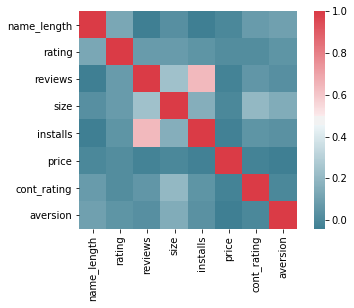

In [94]:
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True);

<font size="6"><b>general regression</b></font><br>

In [96]:
#needed sub-datasets
android_family = android_clean[android_clean["category"] == "FAMILY"]
android_game = android_clean[android_clean["category"] == "GAME"]
android_tools = android_clean[android_clean["category"] == "TOOLS"]

#free apps
android_free = android_clean[android_clean["price"]==0]
android_free_family = android_free[android_free["category"] == "FAMILY"]
android_free_game = android_free[android_free["category"] == "GAME"]
android_free_tools = android_free[android_free["category"] == "TOOLS"]

#paid apps
android_paid = android_clean[android_clean["price"]>0]
android_paid_family = android_paid[android_paid["category"] == "FAMILY"]
android_paid_game = android_paid[android_paid["category"] == "GAME"]
android_paid_tools = android_paid[android_paid["category"] == "TOOLS"]

#without apps which have 20 million reviews
android_reviews= android_clean[android_clean["reviews"] < 20000000]

In [97]:
#regression installs
result = sm.ols(formula="installs ~ cont_rating + rating + size + category + reviews + aversion + name_length + price", data=android_clean).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:51:36   Log-Likelihood:            -1.4430e+05
No. Observations:                7648   AIC:                         2.887e+05
Df Residuals:                    7608   BIC:                         2.890e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [98]:
#regression reviews
result = sm.ols(formula="reviews ~ cont_rating + installs + rating + size + aversion + name_length + price + category", data=android_clean).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     148.7
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:51:37   Log-Likelihood:            -1.1914e+05
No. Observations:                7648   AIC:                         2.384e+05
Df Residuals:                    7608   BIC:                         2.386e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [99]:
#regression rating
result = sm.ols(formula="rating ~ cont_rating + reviews + installs + size + aversion + name_length + price + category", data=android_clean).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     11.77
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.11e-70
Time:                        10:51:37   Log-Likelihood:                -5995.2
No. Observations:                7648   AIC:                         1.207e+04
Df Residuals:                    7608   BIC:                         1.235e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [100]:
#regression size
result = sm.ols(formula="size ~ cont_rating + reviews + installs + rating + aversion + name_length + price + category", data=android_clean).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     78.99
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:51:37   Log-Likelihood:                -33692.
No. Observations:                7648   AIC:                         6.746e+04
Df Residuals:                    7608   BIC:                         6.774e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [101]:
#regression price
result = sm.ols(formula="price ~ cont_rating + reviews + installs + rating + aversion + name_length + size + category", data=android_clean).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     13.71
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           6.15e-85
Time:                        10:51:37   Log-Likelihood:                -17132.
No. Observations:                7648   AIC:                         3.434e+04
Df Residuals:                    7608   BIC:                         3.462e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

<font size="5"><b>regression for the family category</b></font><br>

In [102]:
result = sm.ols(formula="rating ~ cont_rating + reviews + installs + size + aversion + name_length + price + category", data=android_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.633
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.94e-06
Time:                        10:51:37   Log-Likelihood:                -1193.1
No. Observations:                1606   AIC:                             2402.
Df Residuals:                    1598   BIC:                             2445.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.9746      0.063     63.114      

In [103]:
result = sm.ols(formula="reviews ~ cont_rating + rating + installs + size + aversion + name_length + price + category", data=android_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     132.8
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          3.77e-154
Time:                        10:51:37   Log-Likelihood:                -24760.
No. Observations:                1606   AIC:                         4.954e+04
Df Residuals:                    1598   BIC:                         4.958e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.896e+05   2.78e+05     -1.403      

In [104]:
result = sm.ols(formula="installs ~ cont_rating + reviews + rating + size + aversion + name_length + price + category", data=android_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     132.9
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          2.57e-154
Time:                        10:51:37   Log-Likelihood:                -29040.
No. Observations:                1606   AIC:                         5.810e+04
Df Residuals:                    1598   BIC:                         5.814e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.349e+05   3.99e+06      0.034      

In [105]:
result = sm.ols(formula="size ~ cont_rating + reviews + rating + installs + aversion + name_length + price + category", data=android_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     21.80
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           2.89e-28
Time:                        10:51:37   Log-Likelihood:                -7477.3
No. Observations:                1606   AIC:                         1.497e+04
Df Residuals:                    1598   BIC:                         1.501e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.4992      5.888     -1.104      

In [106]:
result = sm.ols(formula="price ~ cont_rating + reviews + installs + size + aversion + name_length + rating + category", data=android_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.812
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           5.43e-08
Time:                        10:51:37   Log-Likelihood:                -3216.7
No. Observations:                1606   AIC:                             6449.
Df Residuals:                    1598   BIC:                             6492.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0684      0.415     -0.165      

<font size="5"><b>regression for the game category</b></font><br>

In [107]:
result = sm.ols(formula="rating ~ cont_rating + reviews + installs + size + aversion + name_length + price + category", data=android_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     9.833
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           7.00e-12
Time:                        10:51:38   Log-Likelihood:                -396.85
No. Observations:                 969   AIC:                             809.7
Df Residuals:                     961   BIC:                             848.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.0470      0.056     72.800      

In [108]:
result = sm.ols(formula="reviews ~ cont_rating + rating + installs + size + aversion + name_length + price + category", data=android_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          1.11e-163
Time:                        10:51:38   Log-Likelihood:                -15805.
No. Observations:                 969   AIC:                         3.163e+04
Df Residuals:                     961   BIC:                         3.166e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.596e+06   1.14e+06     -2.279      

In [109]:
result = sm.ols(formula="installs ~ cont_rating + reviews + rating + size + aversion + name_length + price + category", data=android_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     153.3
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          1.01e-151
Time:                        10:51:38   Log-Likelihood:                -18881.
No. Observations:                 969   AIC:                         3.778e+04
Df Residuals:                     961   BIC:                         3.782e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.671e+07   2.73e+07      0.612      

In [110]:
result = sm.ols(formula="size ~ cont_rating + reviews + rating + installs + aversion + name_length + price + category", data=android_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     37.53
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.24e-46
Time:                        10:51:38   Log-Likelihood:                -4477.9
No. Observations:                 969   AIC:                             8972.
Df Residuals:                     961   BIC:                             9011.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -30.7925      9.521     -3.234      

In [111]:
result = sm.ols(formula="price ~ cont_rating + reviews + rating + installs + aversion + name_length + size + category", data=android_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     4.398
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           8.08e-05
Time:                        10:51:38   Log-Likelihood:                -1643.8
No. Observations:                 969   AIC:                             3304.
Df Residuals:                     961   BIC:                             3343.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.0754      0.513     -2.098      

<font size="5"><b>regression for the tools category</b></font><br>

In [112]:
result = sm.ols(formula="rating ~ cont_rating + reviews + installs + size + aversion + name_length + price + category", data=android_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     5.507
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           3.69e-06
Time:                        10:51:39   Log-Likelihood:                -592.56
No. Observations:                 629   AIC:                             1201.
Df Residuals:                     621   BIC:                             1237.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7489      0.103     36.454      

In [113]:
result = sm.ols(formula="reviews ~ cont_rating + rating + installs + size + aversion + name_length + price + category", data=android_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     69.70
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           4.36e-74
Time:                        10:51:39   Log-Likelihood:                -9451.9
No. Observations:                 629   AIC:                         1.892e+04
Df Residuals:                     621   BIC:                         1.896e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.206e+05   2.38e+05     -1.768      

In [114]:
result = sm.ols(formula="installs ~ cont_rating + reviews + rating + size + aversion + name_length + price + category", data=android_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     62.69
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           4.84e-68
Time:                        10:51:39   Log-Likelihood:                -11579.
No. Observations:                 629   AIC:                         2.317e+04
Df Residuals:                     621   BIC:                         2.321e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.041e+06   7.01e+06     -0.862      

In [115]:
result = sm.ols(formula="size ~ cont_rating + reviews + rating + installs + aversion + name_length + price + category", data=android_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     6.758
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           9.68e-08
Time:                        10:51:39   Log-Likelihood:                -2353.6
No. Observations:                 629   AIC:                             4723.
Df Residuals:                     621   BIC:                             4759.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.8262      2.958      3.998      

In [116]:
result = sm.ols(formula="price ~ cont_rating + reviews + rating + installs + aversion + name_length + size + category", data=android_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.973
Date:                Wed, 09 Jan 2019   Prob (F-statistic):            0.00450
Time:                        10:51:39   Log-Likelihood:                -1018.6
No. Observations:                 629   AIC:                             2053.
Df Residuals:                     621   BIC:                             2089.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9909      0.357      2.779      

<font size="5"><b>hypothesis testing</b></font><br>

<font size="4"><b>hypothesis 1: bigger apps causes better rating/installs/reviews</b></font><br>

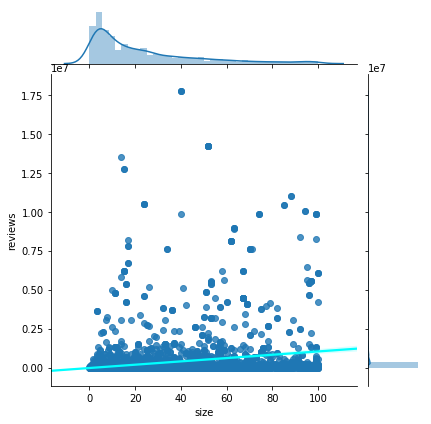

In [117]:
g = sns.jointplot(x="size", y="reviews", data=android_reviews, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})

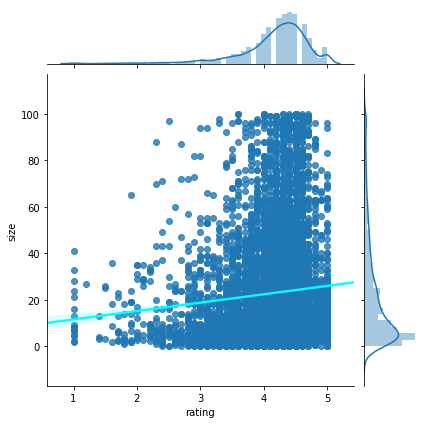

In [118]:
#size on rating -> 60MB+ apps less ratings under 3.0?
#hexaplot -> regplot als unterplot?
g = sns.jointplot(x="rating", y="size", data=android_clean, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})

In [119]:
# #size on installs -> 
# tmp_installs = []
# for element in android_clean.Installs:
#     if(element >= 0 and element < 1000):
#         tmp_installs.append("insignificant")
#     elif(element >= 1000 and element < 50000):
#         tmp_installs.append("small")
#     elif(element >= 50000 and element < 500000):
#         tmp_installs.append("medium")
#     elif(element >= 500000 and element < 10000000):
#         tmp_installs.append("big")
#     elif(element >= 10000000 and element <= 100000000):
#         tmp_installs.append("tremendous")
# android_tmp = android_clean
# android_tmp["Installs"] = tmp_installs
# sns.catplot(x="Installs", y="Size", data=android_tmp);

<font size="4"><b>hypothesis 2: free apps are more popular at android-store than iOS-store</b></font><br>

In [120]:
#regression installs
result = sm.ols(formula="installs ~ cont_rating + rating + size + category + reviews + aversion + name_length", data=android_free).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:51:42   Log-Likelihood:            -1.3399e+05
No. Observations:                7087   AIC:                         2.680e+05
Df Residuals:                    7048   BIC:                         2.683e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [121]:
#regression reviews
result = sm.ols(formula="reviews ~ cont_rating + rating + size + category + installs + aversion + name_length", data=android_free).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     142.0
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:51:42   Log-Likelihood:            -1.1066e+05
No. Observations:                7087   AIC:                         2.214e+05
Df Residuals:                    7048   BIC:                         2.217e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [122]:
#regression rating
result = sm.ols(formula="rating ~ cont_rating + reviews + size + category + installs + aversion + name_length", data=android_free).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     11.29
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           2.00e-65
Time:                        10:51:42   Log-Likelihood:                -5533.6
No. Observations:                7087   AIC:                         1.115e+04
Df Residuals:                    7048   BIC:                         1.141e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [123]:
#regression size
result = sm.ols(formula="size ~ cont_rating + rating + installs + category + reviews + aversion + name_length", data=android_free).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     77.94
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:51:42   Log-Likelihood:                -31196.
No. Observations:                7087   AIC:                         6.247e+04
Df Residuals:                    7048   BIC:                         6.274e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

<font size="4"><b>regression for free FAMILY apps</b></font><br>

In [124]:
result = sm.ols(formula="rating ~ cont_rating + reviews + size + installs + aversion + name_length", data=android_free_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.054
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           3.84e-05
Time:                        10:51:42   Log-Likelihood:                -1061.5
No. Observations:                1461   AIC:                             2137.
Df Residuals:                    1454   BIC:                             2174.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.9715      0.066     59.757      

In [125]:
result = sm.ols(formula="reviews ~ cont_rating + installs + size + rating + aversion + name_length", data=android_free_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     140.9
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          7.73e-141
Time:                        10:51:42   Log-Likelihood:                -22593.
No. Observations:                1461   AIC:                         4.520e+04
Df Residuals:                    1454   BIC:                         4.524e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.511e+05    3.1e+05     -1.453      

In [126]:
result = sm.ols(formula="installs ~ cont_rating + reviews + size + rating + aversion + name_length", data=android_free_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     140.7
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          1.12e-140
Time:                        10:51:42   Log-Likelihood:                -26486.
No. Observations:                1461   AIC:                         5.299e+04
Df Residuals:                    1454   BIC:                         5.302e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.311e+04   4.46e+06      0.019      

In [127]:
result = sm.ols(formula="size ~ cont_rating + reviews + installs + rating + aversion + name_length", data=android_free_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     24.22
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.90e-27
Time:                        10:51:42   Log-Likelihood:                -6813.9
No. Observations:                1461   AIC:                         1.364e+04
Df Residuals:                    1454   BIC:                         1.368e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.0925      6.332     -1.278      

<font size="4"><b>regression for free GAME apps</b></font><br>

In [128]:
result = sm.ols(formula="rating ~ cont_rating + reviews + size + installs + aversion + name_length", data=android_free_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     11.71
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.18e-12
Time:                        10:51:42   Log-Likelihood:                -364.42
No. Observations:                 894   AIC:                             742.8
Df Residuals:                     887   BIC:                             776.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.9863      0.059     67.355      

In [129]:
result = sm.ols(formula="reviews ~ cont_rating + rating + size + installs + aversion + name_length", data=android_free_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     182.9
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          2.39e-151
Time:                        10:51:42   Log-Likelihood:                -14615.
No. Observations:                 894   AIC:                         2.924e+04
Df Residuals:                     887   BIC:                         2.928e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -2.78e+06   1.22e+06     -2.276      

In [130]:
result = sm.ols(formula="installs ~ cont_rating + reviews + size + rating + aversion + name_length", data=android_free_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     163.2
Date:                Wed, 09 Jan 2019   Prob (F-statistic):          1.49e-139
Time:                        10:51:42   Log-Likelihood:                -17455.
No. Observations:                 894   AIC:                         3.492e+04
Df Residuals:                     887   BIC:                         3.496e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.638e+07   2.94e+07      0.558      

In [131]:
result = sm.ols(formula="size ~ cont_rating + reviews + installs + rating + aversion + name_length", data=android_free_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     39.67
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           7.41e-43
Time:                        10:51:42   Log-Likelihood:                -4129.7
No. Observations:                 894   AIC:                             8273.
Df Residuals:                     887   BIC:                             8307.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -33.1631      9.811     -3.380      

<font size="4"><b>regression for free TOOLS apps</b></font><br>

In [132]:
result = sm.ols(formula="rating ~ cont_rating + reviews + size + installs + aversion + name_length", data=android_free_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     6.159
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           2.85e-06
Time:                        10:51:42   Log-Likelihood:                -537.92
No. Observations:                 574   AIC:                             1090.
Df Residuals:                     567   BIC:                             1120.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7854      0.109     34.762      

In [133]:
result = sm.ols(formula="reviews ~ cont_rating + rating + size + installs + aversion + name_length", data=android_free_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     74.51
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           2.12e-68
Time:                        10:51:42   Log-Likelihood:                -8650.7
No. Observations:                 574   AIC:                         1.732e+04
Df Residuals:                     567   BIC:                         1.735e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.619e+05   2.64e+05     -1.748      

In [134]:
result = sm.ols(formula="installs ~ cont_rating + reviews + size + rating + aversion + name_length", data=android_free_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     66.50
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.75e-62
Time:                        10:51:42   Log-Likelihood:                -10592.
No. Observations:                 574   AIC:                         2.120e+04
Df Residuals:                     567   BIC:                         2.123e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -7.41e+06   7.79e+06     -0.951      

In [135]:
result = sm.ols(formula="size ~ cont_rating + reviews + installs + rating + aversion + name_length", data=android_free_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.021
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           4.04e-06
Time:                        10:51:42   Log-Likelihood:                -2161.6
No. Observations:                 574   AIC:                             4337.
Df Residuals:                     567   BIC:                             4368.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.7359      3.217      3.959      

<font size="4"><b>hypothesis 3: paid apps are more popular at iOS-store than android-store</b></font><br>

In [136]:
result = sm.ols(formula="installs ~ cont_rating + reviews + size + category + rating + aversion + name_length + price", data=android_paid).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     26.74
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.95e-91
Time:                        10:51:43   Log-Likelihood:                -7841.5
No. Observations:                 561   AIC:                         1.575e+04
Df Residuals:                     527   BIC:                         1.590e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [137]:
result = sm.ols(formula="reviews ~ cont_rating + rating + size + category + installs + aversion + name_length + price", data=android_paid).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.04
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           9.96e-95
Time:                        10:51:43   Log-Likelihood:                -6283.0
No. Observations:                 561   AIC:                         1.263e+04
Df Residuals:                     527   BIC:                         1.278e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [138]:
result = sm.ols(formula="rating ~ cont_rating + reviews + size + category + installs + aversion + name_length + price", data=android_paid).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.282
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           8.90e-05
Time:                        10:51:43   Log-Likelihood:                -430.20
No. Observations:                 561   AIC:                             928.4
Df Residuals:                     527   BIC:                             1076.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [139]:
result = sm.ols(formula="size ~ cont_rating + reviews + installs + category + rating + aversion + name_length + price", data=android_paid).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     5.272
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.18e-17
Time:                        10:51:43   Log-Likelihood:                -2470.9
No. Observations:                 561   AIC:                             5010.
Df Residuals:                     527   BIC:                             5157.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [140]:
result = sm.ols(formula="price ~ cont_rating + reviews + installs + category + rating + aversion + name_length + size", data=android_paid).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     4.417
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           7.53e-14
Time:                        10:51:43   Log-Likelihood:                -1834.8
No. Observations:                 561   AIC:                             3738.
Df Residuals:                     527   BIC:                             3885.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

<font size="4"><b>regression for paid FAMILY apps</b></font><br>

In [141]:
result = sm.ols(formula="rating ~ cont_rating + reviews + size + installs + aversion + name_length + price", data=android_paid_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.369
Date:                Wed, 09 Jan 2019   Prob (F-statistic):              0.223
Time:                        10:51:43   Log-Likelihood:                -124.69
No. Observations:                 145   AIC:                             265.4
Df Residuals:                     137   BIC:                             289.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.0807      0.226     18.026      

In [142]:
result = sm.ols(formula="reviews ~ cont_rating + rating + size + installs + aversion + name_length + price", data=android_paid_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     54.95
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           9.87e-37
Time:                        10:51:43   Log-Likelihood:                -1589.7
No. Observations:                 145   AIC:                             3195.
Df Residuals:                     137   BIC:                             3219.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3447.1382   1.01e+04     -0.340      

In [143]:
result = sm.ols(formula="installs ~ cont_rating + reviews + size + rating + aversion + name_length + price", data=android_paid_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     53.65
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           3.25e-36
Time:                        10:51:43   Log-Likelihood:                -1878.7
No. Observations:                 145   AIC:                             3773.
Df Residuals:                     137   BIC:                             3797.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.022e+04   7.45e+04      0.271      

In [144]:
result = sm.ols(formula="size ~ cont_rating + reviews + installs + rating + aversion + name_length + price", data=android_paid_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.691
Date:                Wed, 09 Jan 2019   Prob (F-statistic):             0.0121
Time:                        10:51:44   Log-Likelihood:                -655.63
No. Observations:                 145   AIC:                             1327.
Df Residuals:                     137   BIC:                             1351.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.7736     16.149      0.729      

In [145]:
result = sm.ols(formula="price ~ cont_rating + reviews + installs + rating + aversion + name_length + size", data=android_paid_family).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     2.466
Date:                Wed, 09 Jan 2019   Prob (F-statistic):             0.0206
Time:                        10:51:44   Log-Likelihood:                -409.71
No. Observations:                 145   AIC:                             835.4
Df Residuals:                     137   BIC:                             859.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5613      2.965     -0.527      

<font size="4"><b>regression for paid GAME apps</b></font><br>

In [146]:
result = sm.ols(formula="rating ~ cont_rating + reviews + size + installs + aversion + name_length + price", data=android_paid_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.199
Date:                Wed, 09 Jan 2019   Prob (F-statistic):              0.315
Time:                        10:51:44   Log-Likelihood:                -24.550
No. Observations:                  75   AIC:                             65.10
Df Residuals:                      67   BIC:                             83.64
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.5972      0.166     27.705      

In [147]:
result = sm.ols(formula="reviews ~ cont_rating + rating + size + installs + aversion + name_length + price", data=android_paid_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     19.82
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           4.09e-14
Time:                        10:51:45   Log-Likelihood:                -892.65
No. Observations:                  75   AIC:                             1801.
Df Residuals:                      67   BIC:                             1820.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1366.3896   6.23e+04     -0.022      

In [148]:
result = sm.ols(formula="installs ~ cont_rating + reviews + size + rating + aversion + name_length + price", data=android_paid_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     19.52
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           5.70e-14
Time:                        10:51:45   Log-Likelihood:                -1112.7
No. Observations:                  75   AIC:                             2241.
Df Residuals:                      67   BIC:                             2260.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.68e+04   1.17e+06     -0.040      

In [149]:
result = sm.ols(formula="size ~ cont_rating + reviews + installs + rating + aversion + name_length + price", data=android_paid_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     2.260
Date:                Wed, 09 Jan 2019   Prob (F-statistic):             0.0398
Time:                        10:51:45   Log-Likelihood:                -345.66
No. Observations:                  75   AIC:                             707.3
Df Residuals:                      67   BIC:                             725.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0401     42.365      0.119      

In [150]:
result = sm.ols(formula="price ~ cont_rating + reviews + installs + rating + aversion + name_length + size", data=android_paid_game).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     2.512
Date:                Wed, 09 Jan 2019   Prob (F-statistic):             0.0235
Time:                        10:51:45   Log-Likelihood:                -187.18
No. Observations:                  75   AIC:                             390.4
Df Residuals:                      67   BIC:                             408.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9484      5.120      0.185      

<font size="4"><b>regression for paid TOOLS apps</b></font><br>

In [151]:
result = sm.ols(formula="rating ~ cont_rating + reviews + size + installs + aversion + name_length + price", data=android_paid_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.296
Date:                Wed, 09 Jan 2019   Prob (F-statistic):              0.277
Time:                        10:51:46   Log-Likelihood:                -50.644
No. Observations:                  55   AIC:                             115.3
Df Residuals:                      48   BIC:                             129.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7317      0.331     11.272      

In [152]:
result = sm.ols(formula="reviews ~ cont_rating + rating + size + installs + aversion + name_length + price", data=android_paid_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     24.65
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           4.18e-13
Time:                        10:51:46   Log-Likelihood:                -532.09
No. Observations:                  55   AIC:                             1078.
Df Residuals:                      48   BIC:                             1092.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     166.2802   4004.154      0.042      

In [153]:
result = sm.ols(formula="installs ~ cont_rating + reviews + size + rating+ aversion + name_length + price", data=android_paid_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               installs   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     17.81
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           9.96e-11
Time:                        10:51:47   Log-Likelihood:                -588.52
No. Observations:                  55   AIC:                             1191.
Df Residuals:                      48   BIC:                             1205.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.053e+04   1.11e+04     -0.951      

In [154]:
result = sm.ols(formula="size ~ cont_rating + reviews + installs + rating+ aversion + name_length + price", data=android_paid_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     7.336
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.34e-05
Time:                        10:51:47   Log-Likelihood:                -165.04
No. Observations:                  55   AIC:                             344.1
Df Residuals:                      48   BIC:                             358.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0274      5.058      0.203      

In [155]:
result = sm.ols(formula="price ~ cont_rating + reviews + installs + rating+ aversion + name_length + size", data=android_paid_tools).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.8086
Date:                Wed, 09 Jan 2019   Prob (F-statistic):              0.568
Time:                        10:51:47   Log-Likelihood:                -130.73
No. Observations:                  55   AIC:                             275.5
Df Residuals:                      48   BIC:                             289.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.2070      2.504      2.878      

<font size="4"><b>hypothesis 4: impact of age rating on popularity</b></font><br>

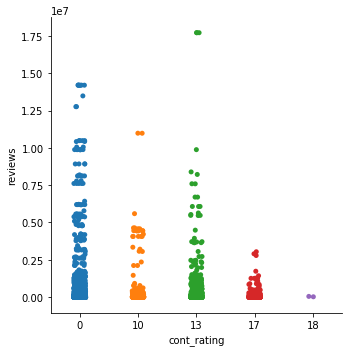

In [156]:
#Reviews on content_rating -> Adults give less Reviews
sns.catplot(x='cont_rating', y='reviews', data=android_reviews)

In [157]:
#Rating on content rating -> teens are giving better ratings
g = sns.catplot(x="cont_rating", y="rating", data=android_clean, kind='box':{showfliers= False})

SyntaxError: invalid syntax (<ipython-input-157-1989cbbc0086>, line 2)

<font size="4"><b>hypothesis 5: correlation between needed android version and popularity</b></font><br>

In [ ]:
g = sns.jointplot(x="aversion", y="rating", data=android_clean, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})

In [ ]:
g = sns.jointplot(x="aversion", y="reviews", data=android_reviews, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})

<font size="4"><b>hypothesis 6: correlation between the length of the app name and popularity of the app</b></font><br>

In [ ]:
#apps with names longer than 50 chars are less reviewed
g = sns.jointplot(x="name_length", y="reviews", data=android_reviews, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})

In [ ]:
#better rated apps got longer names (Siehe 50iger und ca. 30iger Kante)
g = sns.jointplot(x="name_length", y="rating", data=android_clean, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})

In [ ]:
N = 5
appFree = (1461, 894, 574, 245, 211)
appPaid = (145, 75, 55, 78, 63)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = ptl.subplots(figsize=(20, 10))
p1 = ptl.bar(ind, appFree, width)
p2 = ptl.bar(ind, appPaid, width,
             bottom=appFree)
ptl.ylabel('Amount')
ptl.title('Amount of free/paid Apps for top 5 categories')
ptl.xticks(ind, ('FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'PERSONALIZATION'))
ptl.legend((p1[0], p2[0]), ('Free', 'Paid'))


ptl.show()